<a href="https://colab.research.google.com/github/medini-sr/AeroMIT_unofficial/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   

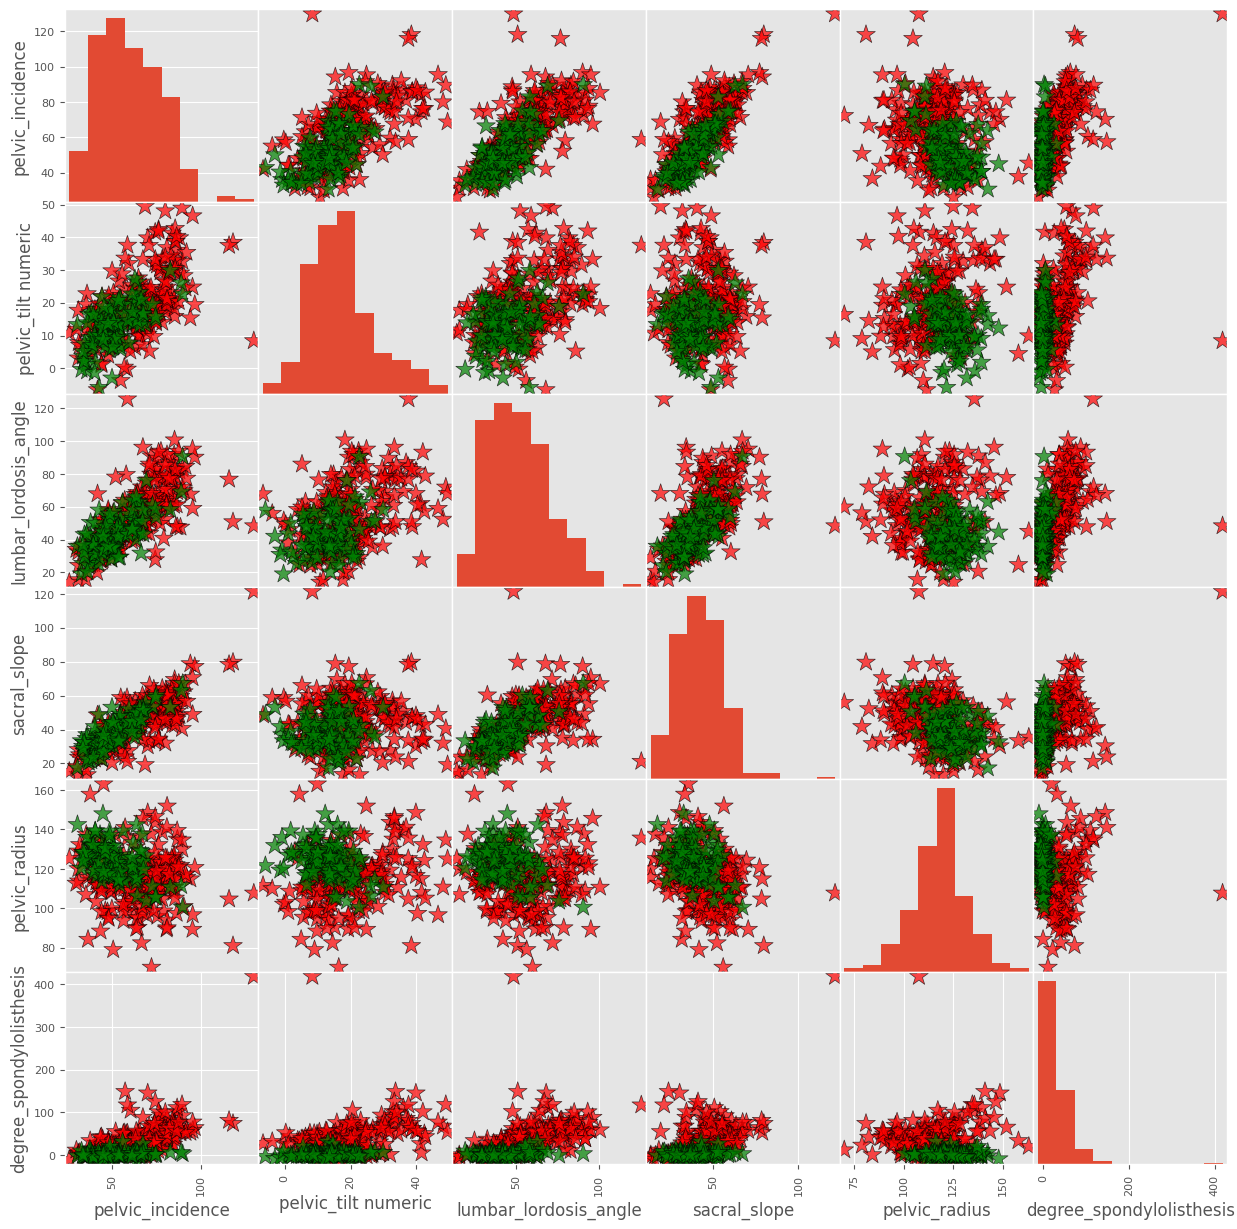

InvalidParameterError: ignored

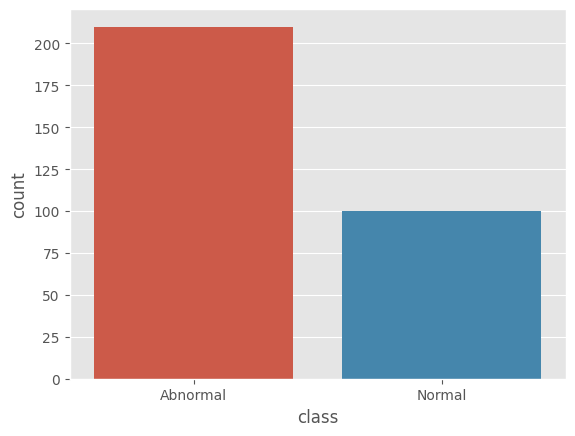

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
data = pd.read_csv("data2.csv")
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')
data.info()
data.describe()
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform it
x_scaled = scaler.fit_transform(x)
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.7,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()
from sklearn.neighbors import KNeighborsClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
##knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)


"""print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))"""
neig = np.arange(1, 39)

train_accuracy = []
test_accuracy = []
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(x_train,y_train)

best_k = grid.best_params_['n_neighbors']
for i, k in enumerate(neig,):

    knn = KNeighborsClassifier(n_neighbors=19)

    knn.fit(x_train,y_train)

    train_accuracy.append(knn.score(x_train, y_train))

    test_accuracy.append(knn.score(x_test, y_test))



plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
